<font color='blue' size='5px'/> Hotel Reservations Dataset - LogReg<font/>

# Overview 

The online hotel reservation channels have dramatically changed booking possibilities and customers’ behavior. A significant number of hotel reservations are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with.

- Booking_ID: unique identifier of each booking


- no_of_adults: Number of adults


- no_of_children: Number of Children


- no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel


- no_of_week_nights: Number of week nights (Monday to Friday) - the guest stayed or booked to stay at the hotel


- type_of_meal_plan: Type of meal plan booked by the customer


- required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)


- room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.


- lead_time: Number of days between the date of booking and the arrival date


- arrival_year: Year of arrival date


- arrival_month: Month of arrival date


- arrival_date: Date of the month


- market_segment_type: Market segment designation.


- repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)


- no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking


- no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking


- avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)


- no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)


- booking_status: Flag indicating if the booking was canceled or not.

## Target

Can you predict if the customer is going to honor the reservation or cancel it ?

##  Literature Review

https://www.linkedin.com/pulse/u-hotel-booking-cancellations-using-machine-learning-manuel-banza/

# 1 Packages

In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('whitegrid')

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler

# 2 Explore Data

In [32]:
Hotel_data=pd.read_csv('Hotel Reservations.csv')

In [33]:
Hotel_data.head(5)

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [5]:
Hotel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [6]:
Hotel_data['type_of_meal_plan'].unique()

array(['Meal Plan 1', 'Not Selected', 'Meal Plan 2', 'Meal Plan 3'],
      dtype=object)

In [7]:
Hotel_data['room_type_reserved'].unique()

array(['Room_Type 1', 'Room_Type 4', 'Room_Type 2', 'Room_Type 6',
       'Room_Type 5', 'Room_Type 7', 'Room_Type 3'], dtype=object)

In [8]:
Hotel_data['market_segment_type'].unique()

array(['Offline', 'Online', 'Corporate', 'Aviation', 'Complementary'],
      dtype=object)

In [9]:
Hotel_data['booking_status'].unique()

array(['Not_Canceled', 'Canceled'], dtype=object)

C:\Users\Abdelrahman\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Status', ylabel='count'>

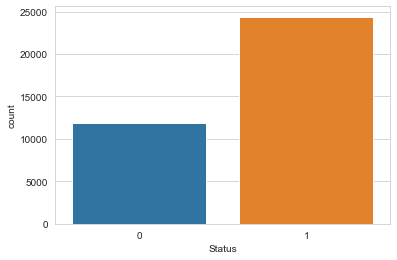

In [53]:
sns.countplot('Status',data=Hotel_data)

<AxesSubplot:xlabel='type_of_meal_plan', ylabel='count'>

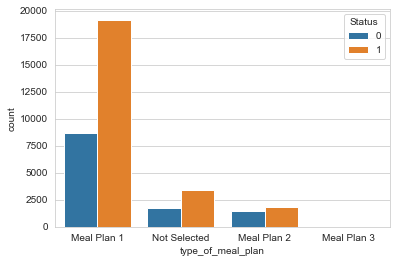

In [47]:
sns.countplot(x='type_of_meal_plan',data=Hotel_data,hue='Status')

<AxesSubplot:xlabel='market_segment_type', ylabel='count'>

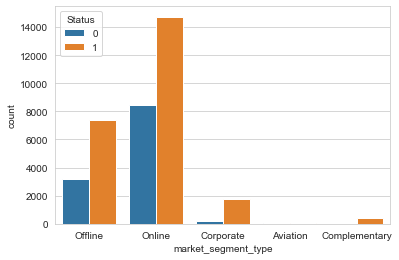

In [43]:
sns.countplot(x='market_segment_type',data=Hotel_data,hue='Status')

<AxesSubplot:xlabel='room_type_reserved', ylabel='count'>

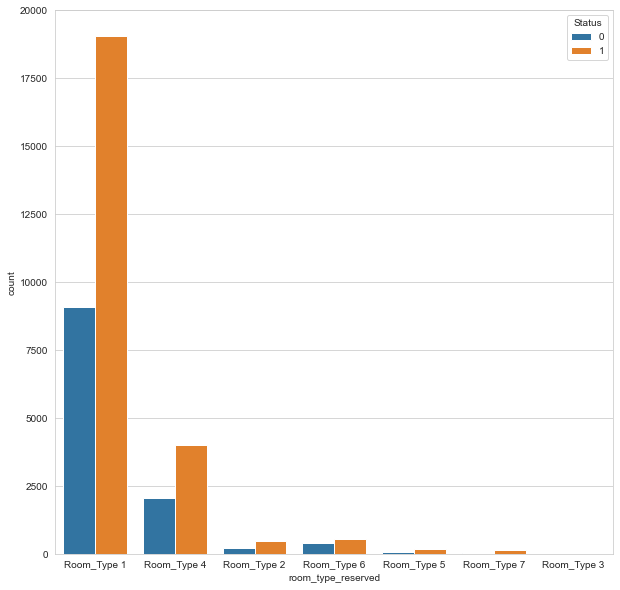

In [45]:
plt.figure(figsize=(10,10))
sns.countplot(x='room_type_reserved',data=Hotel_data,hue='Status')

<AxesSubplot:xlabel='arrival_year', ylabel='Count'>

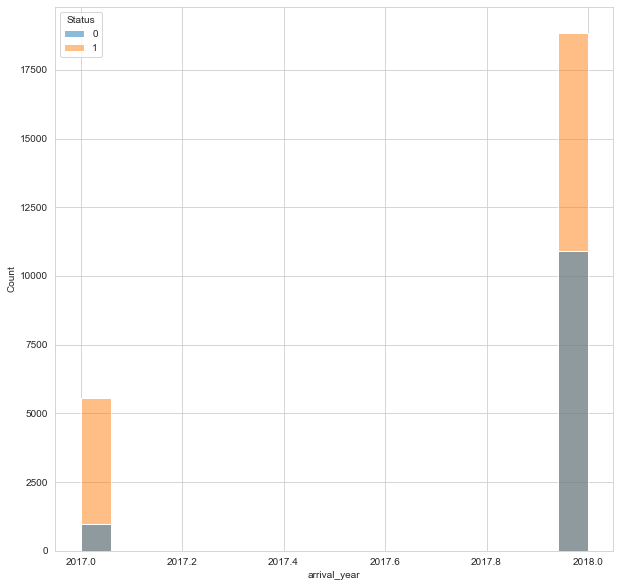

In [50]:
plt.figure(figsize=(10,10))
sns.histplot(x='arrival_year',data=Hotel_data,hue='booking_status')

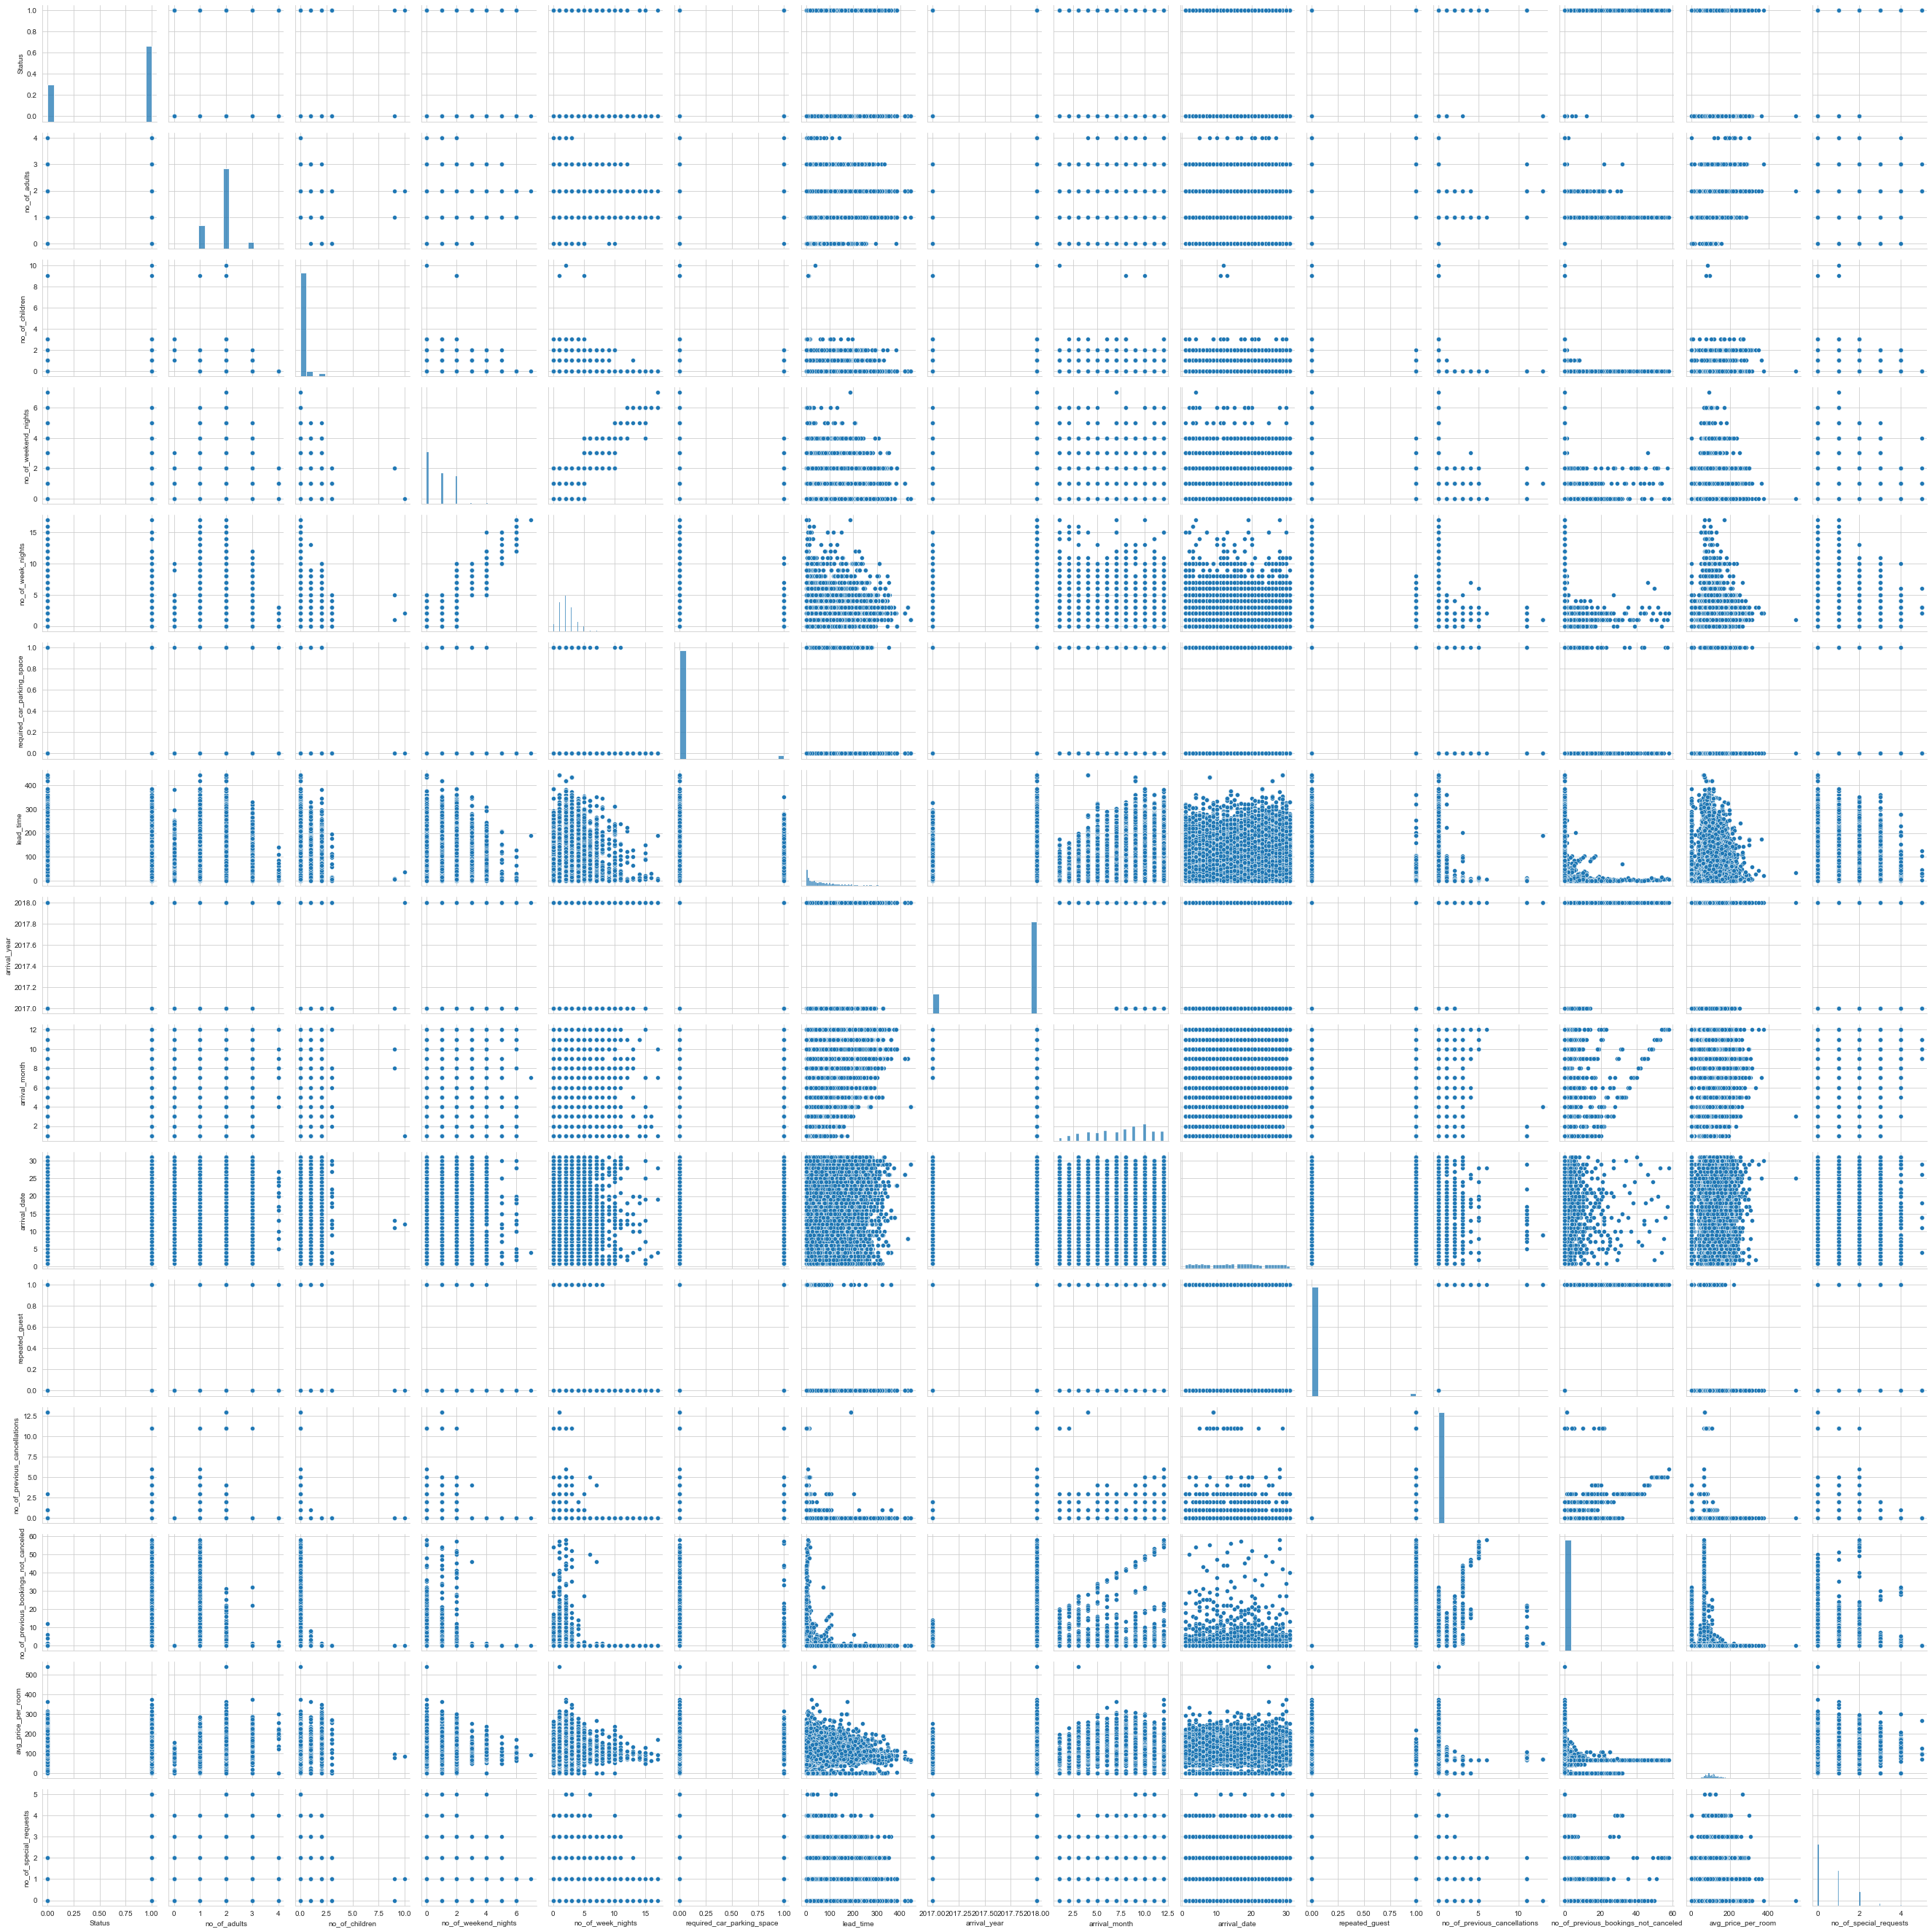

In [48]:
sns.pairplot(Hotel_data)

In [55]:
Hotel_data.columns

Index(['Status', 'Booking_ID', 'no_of_adults', 'no_of_children',
       'no_of_weekend_nights', 'no_of_week_nights', 'type_of_meal_plan',
       'required_car_parking_space', 'room_type_reserved', 'lead_time',
       'arrival_year', 'arrival_month', 'arrival_date', 'market_segment_type',
       'repeated_guest', 'no_of_previous_cancellations',
       'no_of_previous_bookings_not_canceled', 'avg_price_per_room',
       'no_of_special_requests', 'booking_status'],
      dtype='object')

<AxesSubplot:xlabel='arrival_month', ylabel='Count'>

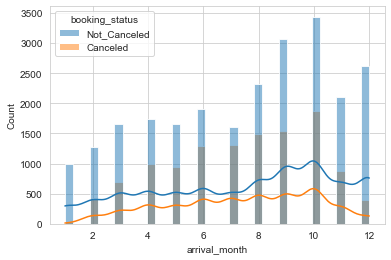

In [57]:
sns.histplot(x='arrival_month',hue='booking_status',data=Hotel_data,kde=True)

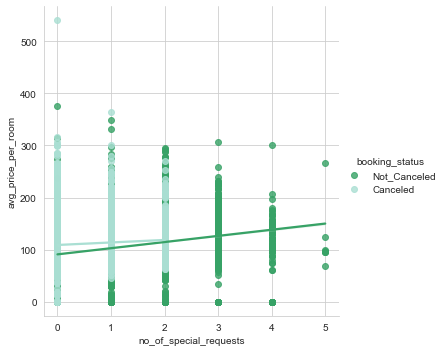

In [63]:
sns.lmplot(x='no_of_special_requests',y='avg_price_per_room',data=Hotel_data,hue='booking_status',palette='BuGn_r')

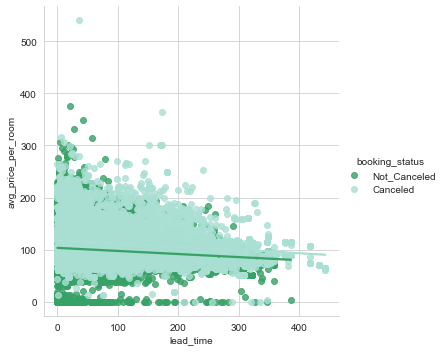

In [62]:
sns.lmplot(x='lead_time',y='avg_price_per_room',data=Hotel_data,hue='booking_status',palette='BuGn_r')

# 3 Freature Engineering 

## 3.1 Missing Data

<AxesSubplot:>

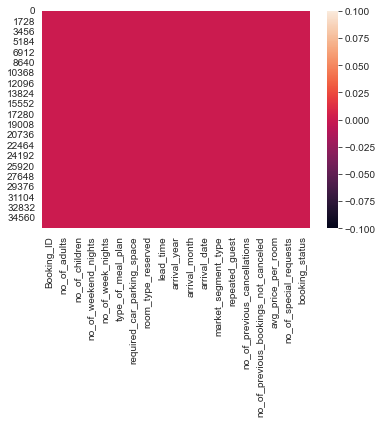

In [11]:
sns.heatmap(Hotel_data.isnull())

## 3.2 Dummy Variables

In [35]:
Book_status=pd.get_dummies(Hotel_data['booking_status'],drop_first=True)

In [36]:
Book_status.columns=['Status']

In [37]:
Book_status

,Status
0,1
1,1
2,0
3,0
4,0
...,...
36270,1
36271,0
36272,1
36273,0


In [38]:
Hotel_data=pd.concat([Book_status,Hotel_data],axis=1)

In [39]:
Hotel_data

,Status,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,1,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,0,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,0,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,0,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,1,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,0,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,1,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,0,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled


## 3.3 Drop Data

In [17]:
Hotel_data.drop('Booking_ID',axis=1,inplace=True)

In [18]:
Hotel_data.head(5)

,Status,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,1,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,0,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,0,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,0,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [19]:
Hotel_data.drop(['type_of_meal_plan','room_type_reserved','market_segment_type'],axis=1,inplace=True)

In [20]:
Hotel_data.drop('booking_status',axis=1,inplace=True)

# 4 Preprocessing

## 4.1 Split Data

In [21]:
X=Hotel_data.drop('Status',axis=1)

In [22]:
y=Hotel_data['Status']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## 4.2 Scalling 

In [24]:
scaler=StandardScaler()

In [25]:
scaler.fit(X_train,y_train)

StandardScaler()

In [26]:
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

# 5 Training

In [27]:
Hotel_LogReg=LogisticRegression()

In [28]:
Hotel_LogReg.fit(X_train,y_train)

LogisticRegression()

# 6 Prediction

In [30]:
y_pred=Hotel_LogReg.predict(X_test)

# 7 Evaluation

In [31]:
print(confusion_matrix(y_test,y_pred))
print()
print(classification_report(y_test,y_pred))

[[2199 1762]
 [ 770 7240]]

              precision    recall  f1-score   support

           0       0.74      0.56      0.63      3961
           1       0.80      0.90      0.85      8010

    accuracy                           0.79     11971
   macro avg       0.77      0.73      0.74     11971
weighted avg       0.78      0.79      0.78     11971

